## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path("Resources/bitstamp.csv"),
    index_col='Timestamp',
    parse_dates=True,
    infer_datetime_format=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Used the .head() function to view the first 5 rows of the csv file.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path("Resources/coinbase.csv"),
    index_col='Timestamp',
    parse_dates=True,
    infer_datetime_format=True
)

In [5]:
# Used the .tail() function to view that last 5 rows of the csv file
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# Used the dropna() function to drop the missing values.  I created a new variable "bitstamp.df" when dropping this values in case I needed to revert back.
bitstamp_df = bitstamp.dropna()


In [7]:
# Used the .isnull() combined with .sum() function to confirm that the NaN rows were dropped.
bitstamp_df.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [8]:
# Used the str.replace function to remove the dollar sign from the dataframe
bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].str.replace("$", "")
bitstamp_df.head()

/Users/jimhitchcock/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/Users/jimhitchcock/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [9]:
# Converted the Close data type to a float
bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].astype("float")


/Users/jimhitchcock/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [10]:
# Used the .dtypes function to check that the column value of "Close" (all all columns for that matter) are now float value
bitstamp_df.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [11]:
# Checked for duplicates by using the duplicated() and sum() functions.
bitstamp_df.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [12]:
# Used the isnull() combined with sum() functions to see how many rows need to be removed.
coinbase.isnull().sum()

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [13]:
# Repeat Steps 1–4 for the coinbase DataFrame
# Used the dropna() function to drop the missing values.  I created a new variable "coinbase.df" when dropping this values
# in case I needed to revert back. Then used isnull().sum() to confirm they were removed.
coinbase_df = coinbase.dropna()
coinbase_df.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [14]:
# Used the str.replace function to remove the dollar sign from the dataframe
coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].str.replace("$", "")
coinbase_df.head()

/Users/jimhitchcock/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [15]:
# Converted the Close data type to a float
coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].astype("float")
coinbase_df.head()

/Users/jimhitchcock/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [16]:
# Used the .dtypes function to confirm that the column value was changed to float.
coinbase_df.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [17]:
# Used the .duplicated() with .sum() functions to see if there are any duplicate rows in dataframe.
coinbase_df.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [18]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
# Used iloc function to slice the Bitstamp list into a data frame with "Timestamp"(index) and "Close" columns
bitstamp_sliced = bitstamp_df.iloc[:,[3]]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [19]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
# Used iloc function to slice the Coinbase list into a data frame with "Timestamp"(index) and "Close" columns
coinbase_sliced = coinbase_df.iloc[:, [3]]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [20]:
# Generated the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [21]:
# Generated the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Jan 2018 - March 2018 Bitstamp Bitcoin Prices'}, xlabel='Timestamp'>

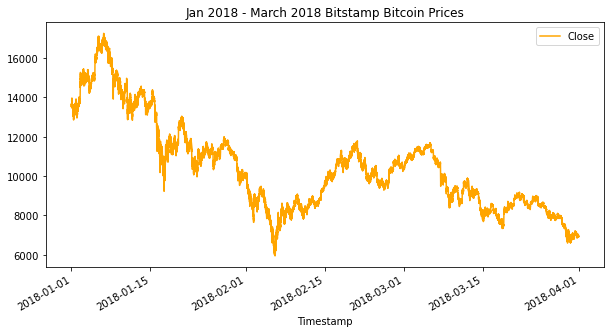

In [22]:
# Created a line plot for the bitstamp DataFrame for the full length of time in the dataset 

bitstamp_sliced.plot(figsize=(10, 5), title="Jan 2018 - March 2018 Bitstamp Bitcoin Prices", color="orange")

<AxesSubplot:title={'center':'Jan 2018 - Mar 2018 Coinbase Bitcoin Prices'}, xlabel='Timestamp'>

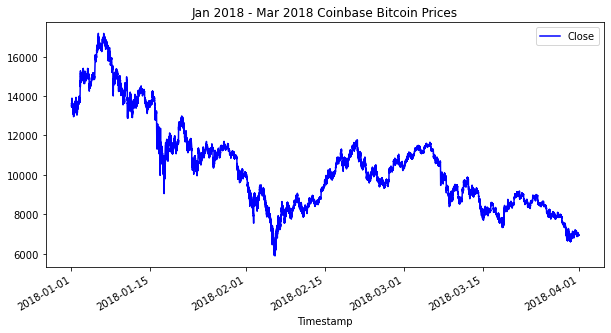

In [23]:
# Created a line plot for the coinbase DataFrame for the full length of time in the dataset 

coinbase_sliced.plot(figsize=(10, 5), title="Jan 2018 - Mar 2018 Coinbase Bitcoin Prices", color="blue")

<AxesSubplot:title={'center':'Jan 2018 - Mar 2018 Bitcoin Prices on Bitstamp & Coinbase'}, xlabel='Timestamp'>

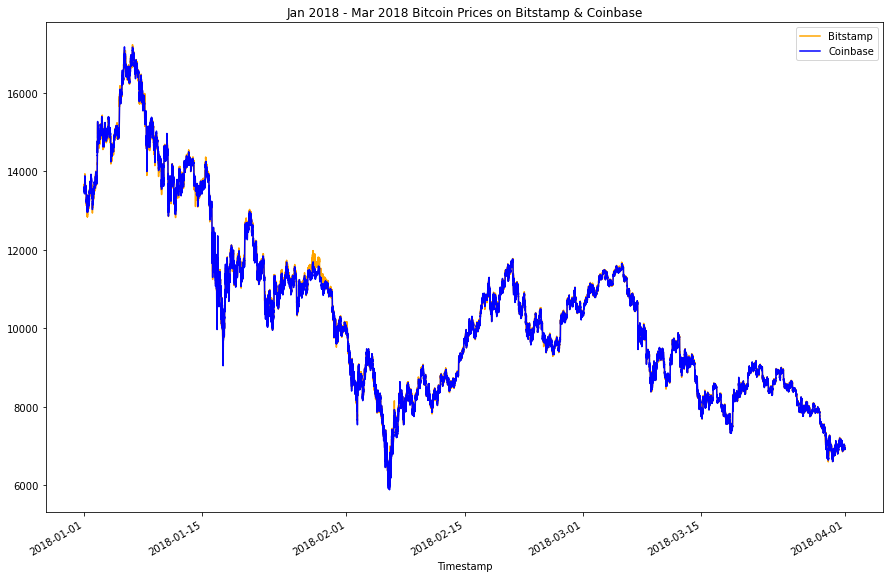

In [24]:
# Overlayed the visualizations for the bitstamp and coinbase DataFrames in one plot.
# I looks like there are only a few good arbitrage opportunities based on the overlay with the best one being around 1/27/18.
bitstamp_sliced["Close"].plot(legend=True, figsize=(15,10), title="Jan 2018 - Mar 2018 Bitcoin Prices on Bitstamp & Coinbase", color="orange", label="Bitstamp")
coinbase_sliced["Close"].plot(legend=True, figsize=(15,10), color="blue", label="Coinbase")


<AxesSubplot:title={'center':'Jan 2018 Bitcoin Prices on Bitstamp & Coinbase'}, xlabel='Timestamp'>

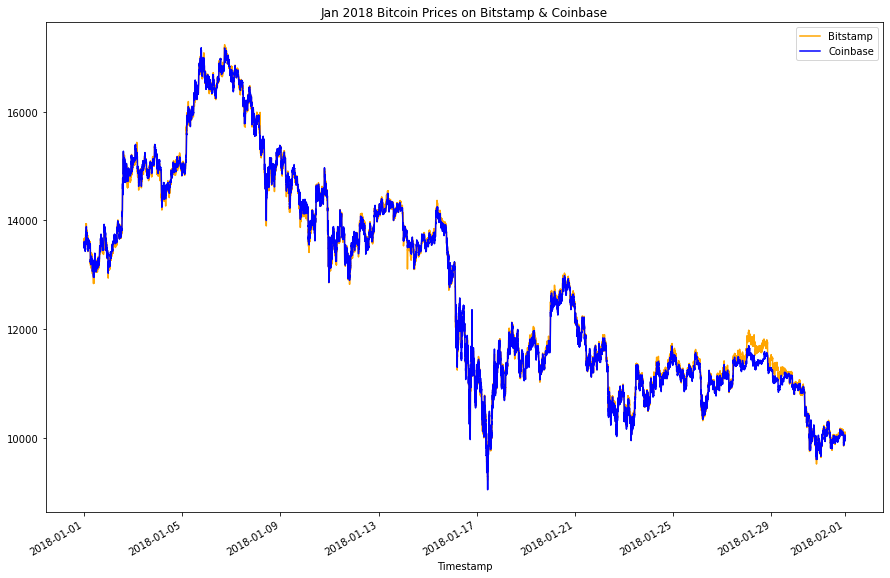

In [25]:
# Used the loc and plot functions, created an overlay plot that visualizes the bitcoin trading on both exchanges for the month of Jan 2018 

bitstamp_sliced["Close"].loc["2018-01-01":"2018-01-31"].plot(
    legend=True, figsize=(15,10), title="Jan 2018 Bitcoin Prices on Bitstamp & Coinbase", color="orange", label="Bitstamp")
coinbase_sliced["Close"].loc["2018-01-01":"2018-01-31"].plot(
    legend=True, figsize=(15,10), color="blue", label="Coinbase")

<AxesSubplot:title={'center':'Mar 2018 Bitcoin Prices on Bitstamp & Coinbase'}, xlabel='Timestamp'>

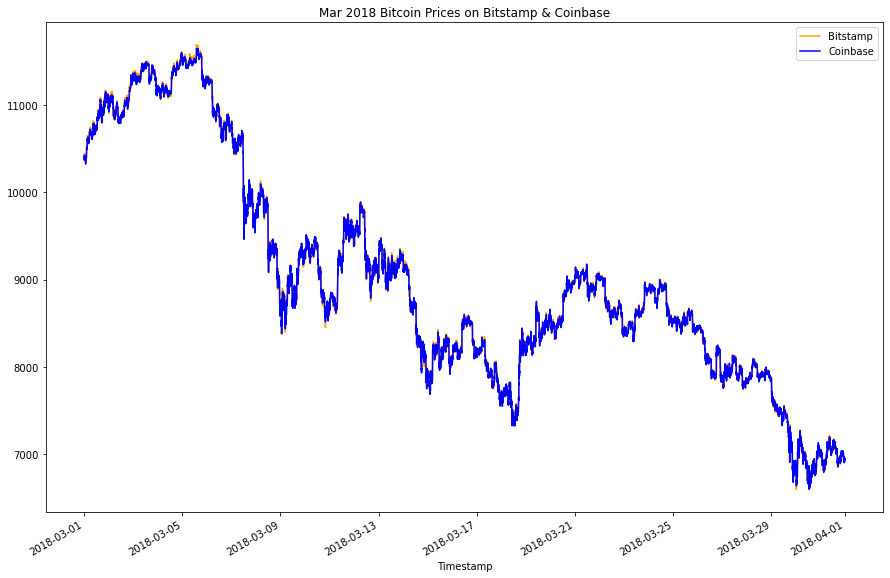

In [26]:
# Used the loc and plot functions, created an overlay plot that visualizes the Bitcoin price on both exchanges for the month of Mar 2018 

bitstamp_sliced["Close"].loc["2018-03-01":"2018-03-31"].plot(
    legend=True, figsize=(15,10), title="Mar 2018 Bitcoin Prices on Bitstamp & Coinbase", color="orange", label="Bitstamp")
coinbase_sliced["Close"].loc["2018-03-01":"2018-03-31"].plot(
    legend=True, figsize=(15,10), color="blue", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitcoin Prices on Jan 27, 2018 on Bitstamp & Coinbase'}, xlabel='Timestamp'>

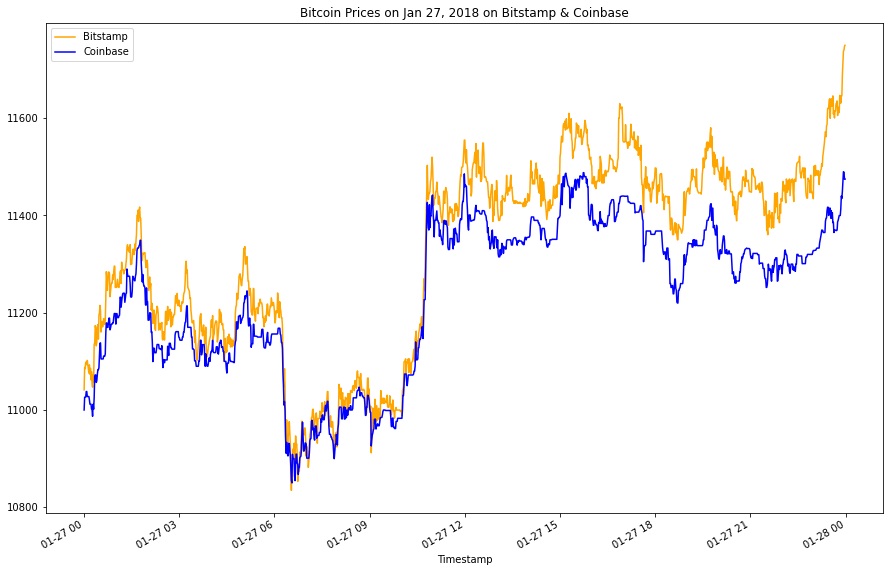

In [27]:
# Created an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. This day shows great arbitrage opportunities.
 
bitstamp_sliced["Close"].loc["2018-01-27"].plot(
    legend=True, figsize=(15,10), title="Bitcoin Prices on Jan 27, 2018 on Bitstamp & Coinbase", color="orange", label="Bitstamp")
coinbase_sliced["Close"].loc["2018-01-27"].plot(
    legend=True, figsize=(15,10), color="blue", label="Coinbase")

In [28]:
# Used the early date of Jan 27, 2018, calculated the arbitrage spread and the describe function to show the statistics
# by subtracting the coinbase lower closing prices from the bitstamp higher closing prices
arbitrage_spread_early = bitstamp_sliced["Close"].loc["2018-01-27"] - coinbase_sliced["Close"].loc["2018-01-27"]

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1421.000000
mean       84.558600
std        51.823073
min       -35.950000
25%        47.430000
50%        75.940000
75%       116.180000
max       275.380000
Name: Close, dtype: float64

<AxesSubplot:>

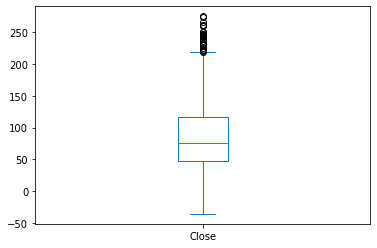

In [29]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind="box")

<AxesSubplot:title={'center':'Bitcoin Prices on Feb 24, 2018 on Bitstamp & Coinbase'}, xlabel='Timestamp'>

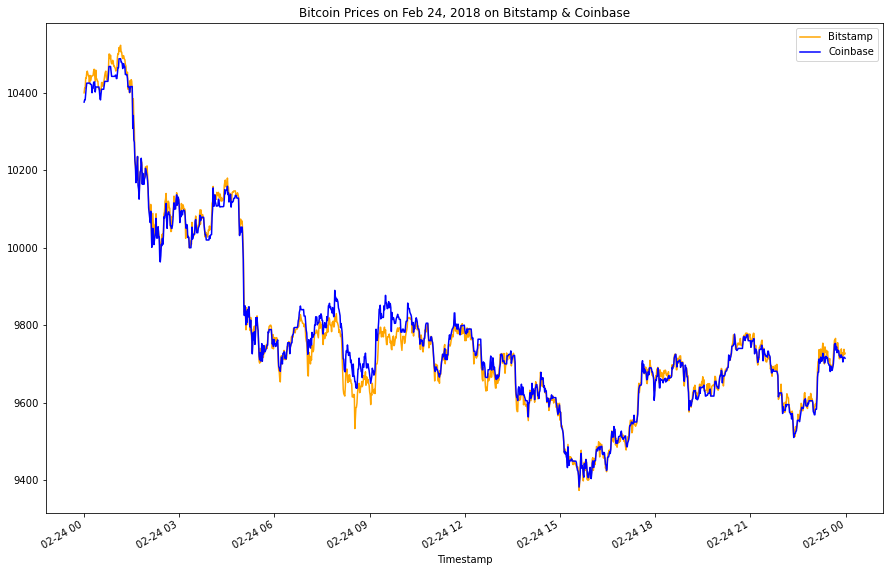

In [30]:
# Created an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset, Feb 24, 2018. 

bitstamp_sliced["Close"].loc["2018-02-24"].plot(
    legend=True, figsize=(15,10), title="Bitcoin Prices on Feb 24, 2018 on Bitstamp & Coinbase", color="orange", label="Bitstamp")
coinbase_sliced["Close"].loc["2018-02-24"].plot(
    legend=True, figsize=(15,10), color="blue", label="Coinbase")

In [31]:
# Using the date of Feb 24, 2018, calculated the arbitrage spread of the price of Bitcoin.
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced["Close"].loc["2018-02-24"] - bitstamp_sliced["Close"].loc["2018-02-24"]

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1437.000000
mean        3.396131
std        22.969472
min       -50.180000
25%       -10.590000
50%        -0.010000
75%        12.120000
max       121.320000
Name: Close, dtype: float64

<AxesSubplot:>

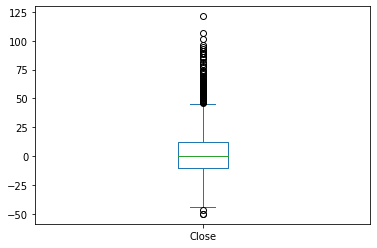

In [32]:
# Visualized the arbitrage spread from Feb 18, 2018 of the dataset in a box plot
arbitrage_spread_middle.plot(kind="box")

<AxesSubplot:title={'center':'Bitcoin Prices on Mar 29, 2018 on Bitstamp & Coinbase'}, xlabel='Timestamp'>

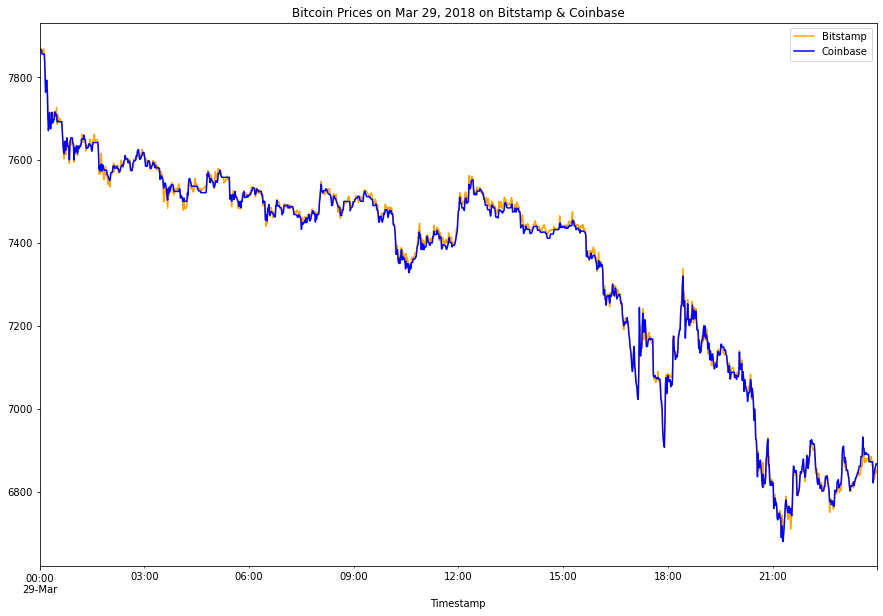

In [33]:
# Created an overlay plot that visualizes the two dataframes over a period of one day from date Mar 29, 2018 in the dataset. 

bitstamp_sliced["Close"].loc["2018-03-29"].plot(
    legend=True, figsize=(15,10), title="Bitcoin Prices on Mar 29, 2018 on Bitstamp & Coinbase", color="orange", label="Bitstamp")
coinbase_sliced["Close"].loc["2018-03-29"].plot(
    legend=True, figsize=(15,10), color="blue", label="Coinbase")

In [34]:
# Using the date of Mar 29, 2018 that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced["Close"].loc["2018-03-29"] - bitstamp_sliced["Close"].loc["2018-03-29"]

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1440.000000
mean       -2.787611
std        10.030143
min       -45.600000
25%        -9.132500
50%        -3.645000
75%         2.942500
max        89.900000
Name: Close, dtype: float64

<AxesSubplot:>

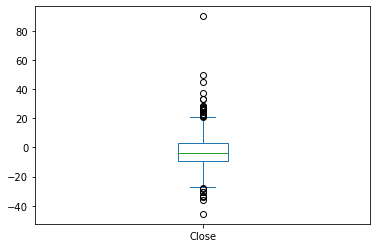

In [35]:
# Visualized the arbitrage spread from the date Mar 29, 2018 in the dataset in a box plot
arbitrage_spread_late.plot(kind="box")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [36]:
# For the date Jan 27, 2018 in the dataset, measured the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp_sliced["Close"].loc["2018-01-27"] - coinbase_sliced["Close"].loc["2018-01-27"]

# Used a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early[arbitrage_spread_early>0].describe()

count    1396.000000
mean       86.261082
std        50.670518
min         0.180000
25%        49.407500
50%        76.850000
75%       117.845000
max       275.380000
Name: Close, dtype: float64

In [37]:
# For the date Feb 24, 2018 of the dataset, measured the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = coinbase_sliced["Close"].loc["2018-02-24"] - bitstamp_sliced["Close"].loc["2018-02-24"]

# Used a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_middle[arbitrage_spread_middle>0].describe()

count    713.000000
mean      19.880351
std       20.699851
min        0.010000
25%        5.040000
50%       12.330000
75%       27.250000
max      121.320000
Name: Close, dtype: float64

In [38]:
# For the date of Mar 29, 2018 of the dataset, measured the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = coinbase_sliced["Close"].loc["2018-03-29"] - bitstamp_sliced["Close"].loc["2018-03-29"]

# Used a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_late[arbitrage_spread_late>0].describe()

count    500.000000
mean       7.567820
std        7.657764
min        0.010000
25%        2.617500
50%        5.535000
75%       10.542500
max       89.900000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [39]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0] / coinbase_sliced["Close"].loc["2018-01-27"]

# Review the spread return DataFrame
spread_return_early.describe()

count    1396.000000
mean        0.007633
std         0.004439
min         0.000016
25%         0.004410
50%         0.006810
75%         0.010352
max         0.023999
Name: Close, dtype: float64

In [40]:
# For the date Feb 24, 2018 in the dataset, calculated the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0] / bitstamp_sliced["Close"].loc["2018-02-24"]

# Review the spread return DataFrame
spread_return_middle.describe()

count    713.000000
mean       0.002048
std        0.002133
min        0.000001
25%        0.000524
50%        0.001280
75%        0.002820
max        0.012726
Name: Close, dtype: float64

In [41]:
# For the date Mar 29, 2018 in the dataset, calculated the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late = arbitrage_spread_late[arbitrage_spread_late > 0] / bitstamp_sliced["Close"].loc["2018-03-29"]

# Review the spread return DataFrame
spread_return_late.describe()

count    500.000000
mean       0.001051
std        0.001084
min        0.000001
25%        0.000352
50%        0.000752
75%        0.001469
max        0.012566
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [42]:
# For the date Jan 27, 2018 in the dataset, determined the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > 0.01]

# Reviewed the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-27 00:19:00    0.010039
2018-01-27 03:12:00    0.010372
2018-01-27 12:16:00    0.010346
2018-01-27 12:17:00    0.010271
2018-01-27 12:18:00    0.011292
Name: Close, dtype: float64

In [43]:
# For the date Feb 24, 2018 in the dataset, determined the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > 0.01]

# Reviewed the first five profitable trades
profitable_trades_middle.head()

Timestamp
2018-02-24 08:32:00    0.012726
2018-02-24 09:32:00    0.010974
2018-02-24 09:39:00    0.010431
Name: Close, dtype: float64

In [44]:
# For the date Mar 29, 2018 in the dataset, determined the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > 0.01]

# Reviewed the first five profitable trades
profitable_trades_late.head()

Timestamp
2018-03-29 17:11:00    0.012566
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [45]:
# For the date Jan 27, 2018 in the dataset, generated the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    382.000000
mean       0.013429
std        0.002947
min        0.010006
25%        0.011299
50%        0.012674
75%        0.014792
max        0.023999
Name: Close, dtype: float64

In [46]:
# For the date Feb 24, 2018 in the dataset, generated the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    3.000000
mean     0.011377
std      0.001199
min      0.010431
25%      0.010703
50%      0.010974
75%      0.011850
max      0.012726
Name: Close, dtype: float64

In [47]:
# For the date Mar 29, 2018 in the dataset, generated the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    1.000000
mean     0.012566
std           NaN
min      0.012566
25%      0.012566
50%      0.012566
75%      0.012566
max      0.012566
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [48]:
# For the date Jan 27, 2018 in the dataset, calculated the potential profit per trade in dollars 
# Multiplied the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase_sliced['Close'].loc['2018-01-27']

# Dropped any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# Viewed the early profit DataFrame
profit_per_trade_early

Timestamp
2018-01-27 00:19:00    110.68
2018-01-27 03:12:00    115.97
2018-01-27 12:16:00    117.84
2018-01-27 12:17:00    117.00
2018-01-27 12:18:00    128.63
                        ...  
2018-01-27 23:55:00    242.38
2018-01-27 23:56:00    248.00
2018-01-27 23:57:00    251.00
2018-01-27 23:58:00    273.68
2018-01-27 23:59:00    275.38
Name: Close, Length: 382, dtype: float64

In [49]:
# For the date Feb 24, 2018 in the dataset, calculated the potential profit per trade in dollars 
# Multiplied the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * coinbase_sliced['Close'].loc['2018-02-24']

# Dropped any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# Viewed the early profit DataFrame
profit_per_trade_middle

Timestamp
2018-02-24 08:32:00    122.863957
2018-02-24 09:32:00    108.174256
2018-02-24 09:39:00    102.811390
Name: Close, dtype: float64

In [50]:
# For the date Mar 29, 2018 in the dataset, calculated the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * bitstamp_sliced['Close'].loc['2018-03-29']

# Dropped any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# Viewed the early profit DataFrame
profit_per_trade_late

Timestamp
2018-03-29 17:11:00    89.9
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [51]:
# Generated the summary statistics for the Jan 27, 2018 profit per trade DataFrame
profit_per_trade_early.describe()

count    382.000000
mean     152.383927
std       33.701052
min      110.680000
25%      128.072500
50%      143.640000
75%      168.005000
max      275.380000
Name: Close, dtype: float64

In [52]:
# Generated the summary statistics for the Feb 24, 2018 profit per trade DataFrame
profit_per_trade_middle.describe()

count      3.000000
mean     111.283201
std       10.381499
min      102.811390
25%      105.492823
50%      108.174256
75%      115.519107
max      122.863957
Name: Close, dtype: float64

In [53]:
# Generated the summary statistics for the Mar 29, 2018 profit per trade DataFrame
profit_per_trade_late.describe()

count     1.0
mean     89.9
std       NaN
min      89.9
25%      89.9
50%      89.9
75%      89.9
max      89.9
Name: Close, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

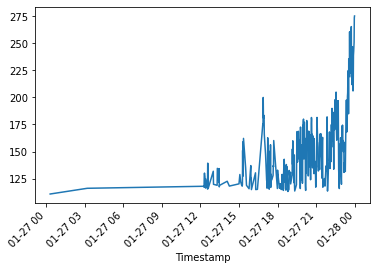

In [54]:
# Plotted the results for the Jan 27, 2018 profit per trade DataFrame
profit_per_trade_early.plot(rot=45)

<AxesSubplot:xlabel='Timestamp'>

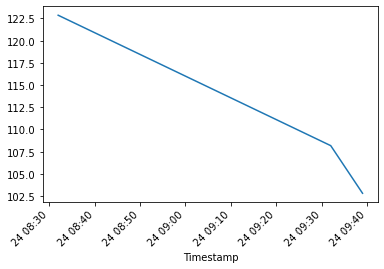

In [55]:
# Plot the results for the Feb 24, 2018 profit per trade DataFrame
profit_per_trade_middle.plot(rot=45)

<AxesSubplot:xlabel='Timestamp'>

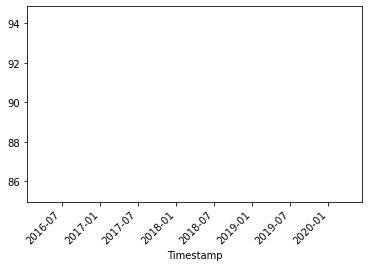

In [56]:
# Plot the results for the Mar 29, 2018 profit per trade DataFrame
profit_per_trade_late.plot(rot=45)

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [57]:
# Calculated the sum of the potential profits for the Jan 27, 2018 profit per trade DataFrame
profit_per_trade_early.sum()

58210.65999999999

In [58]:
# Calculated the sum of the potential profits for the Feb 24, 2018 profit per trade DataFrame
profit_per_trade_middle.sum()

333.8496033506824

In [59]:
# Calculated the sum of the potential profits for the Mar 29, 2018 profit per trade DataFrame
profit_per_trade_late.sum()

89.89999999999964

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [60]:
# Used the cumsum function to calculate the cumulative profits over time for the Jan 27, 2018 profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

In [61]:
# Used the cumsum function to calculate the cumulative profits over time for the Feb 24, 2018 profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()

In [62]:
# Used the cumsum function to calculate the cumulative profits over time for the Mar 29, 2018 profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits for Jan 27, 2018'}, xlabel='Timestamp'>

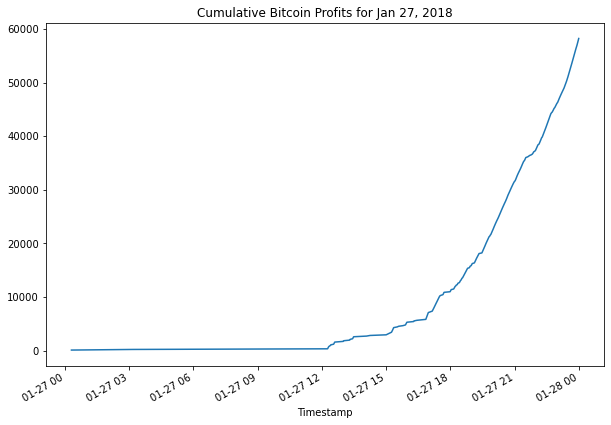

In [63]:
# Plotted the cumulative sum of profits for the Jan 27, 2018 profit per trade DataFrame
cumulative_profit_early.plot(figsize=(10,7), title="Cumulative Bitcoin Profits for Jan 27, 2018")

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits for Feb 24, 2018'}, xlabel='Timestamp'>

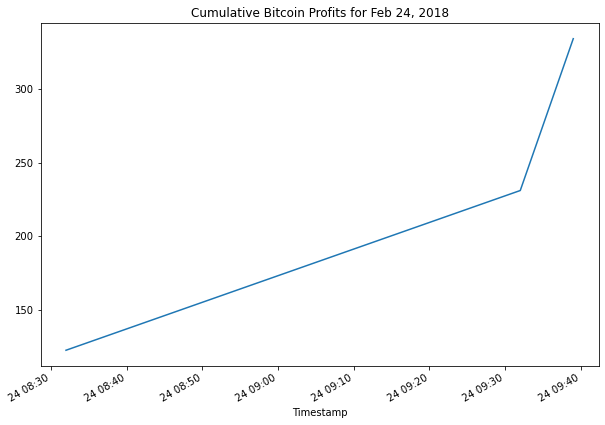

In [64]:
# Plotted the cumulative sum of profits for the Feb 24, 2018 profit per trade DataFrame
cumulative_profit_middle.plot(figsize=(10,7), title="Cumulative Bitcoin Profits for Feb 24, 2018")

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits for Mar 29, 2018'}, xlabel='Timestamp'>

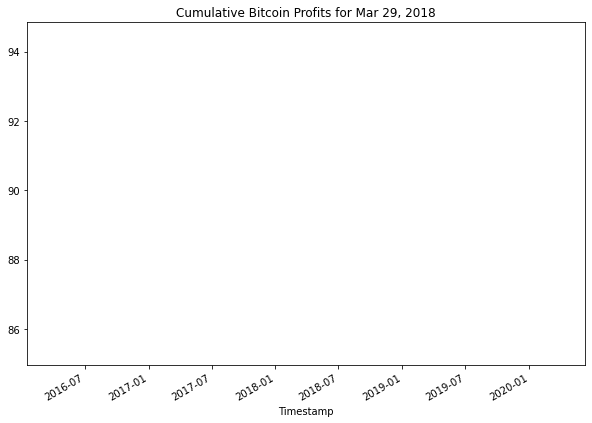

In [65]:
# Plotted the cumulative sum of profits for the Mar 29, 2018 profit per trade DataFrame
cumulative_profit_late.plot(figsize=(10,7), title="Cumulative Bitcoin Profits for Mar 29, 2018")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** The abritrage opportunities were significantly better early in the data set with January 27, 2018 being one of the best days yielding 382 profitable trades.  February 24, 2018 only yielded 3 profitable trades and March 29, 2018 yielded only 1 profitable trade.